In [20]:
import os
import random
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
import IPython.display as ipd
from pylab import figure, axes, pie, title, show
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import pylab

In [21]:
cd C:\Users\Charles\Desktop\AI Cough Detection\Cough

C:\users\charles\desktop\AI Cough Detection\cough


0.0    1960
1.0      40
Name: label, dtype: int64

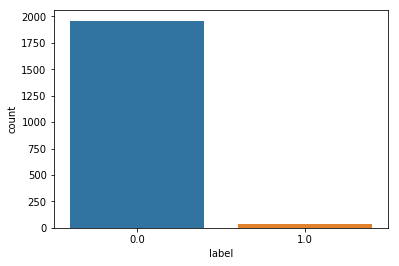

In [22]:
# Class Distribution
df_data = pd.read_csv('train_labels.csv')
g = sns.countplot(df_data['label'])
df_data['label'].value_counts()

In [23]:
# define directories
base_dir = "./"
esc_dir = os.path.join(base_dir, "cough")
meta_file = os.path.join(base_dir, "train_labels_2000.csv")
audio_dir = os.path.join(base_dir, "train/")

In [24]:
# load metadata
meta_data = pd.read_csv(meta_file)
meta_data

,filename,label
0,1-100032-A-0.wav,0
1,1-100038-A-14.wav,0
2,1-100210-A-36.wav,0
3,1-100210-B-36.wav,0
4,1-101296-A-19.wav,0
5,1-101296-B-19.wav,0
6,1-101336-A-30.wav,0
7,1-101404-A-34.wav,0
8,1-103298-A-9.wav,0
9,1-103995-A-30.wav,0


In [25]:
# load a wave data
def load_wave_data(audio_dir, file_name):
    file_path = os.path.join(audio_dir, file_name)
    x, fs = librosa.load(file_path, sr=44100)
    return x,fs

In [26]:
# change wave data to mel-stft
def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft,n_mels=128)
    return melsp

In [27]:
# display wave in plots
def show_wave(x):
    plt.plot(x)
    plt.show()

In [28]:
#display wave in heatmap
def show_melsp(melsp, fs):
    librosa.display.specshow(melsp, sr=fs)
    #plt.colorbar()
    plt.show()
    #plt.axis('off')

In [29]:
# data augmentation: add white noise
def add_white_noise(x, rate=0.002):
    return x + rate*np.random.randn(len(x))

In [30]:
# data augmentation: shift sound in timeframe
def shift_sound(x, rate=2):
    return np.roll(x, int(len(x)//rate))

In [31]:
# data augmentation: stretch sound
def stretch_sound(x, rate=1.1):
    input_length = len(x)
    x = librosa.effects.time_stretch(x, rate)
    if len(x)>input_length:
        return x[:input_length]
    else:
        return np.pad(x, (0, max(0, input_length - len(x))), "constant")

In [32]:
'''!git init
!git add .
!git commit -m "Initial commit"
!git remote add origin https://github.com/CharlesNJohn/Cough.git
!git push -f origin master'''

'!git init\n!git add .\n!git commit -m "Initial commit"\n!git remote add origin https://github.com/CharlesNJohn/Cough.git\n!git push -f origin master'

In [33]:
!git remote -v

origin	https://github.com/CharlesNJohn/Cough.git (fetch)
origin	https://github.com/CharlesNJohn/Cough.git (push)


In [34]:
!git push origin master

Everything up-to-date


In [35]:
!git commit -m "updated"

On branch master
Changes not staged for commit:
	modified:   .ipynb_checkpoints/Cough-checkpoint.ipynb
	deleted:    44100.png
	modified:   Cough.ipynb
	deleted:    [0. 0. 0. ... 0. 0. 0.].png
	deleted:    audio_cough only/cough/108017__erocshadow__cough.wav
	deleted:    audio_cough only/cough/132601__carlossolano019__cough.wav
	deleted:    audio_cough only/cough/13799__pfly__babycough01.wav
	deleted:    audio_cough only/cough/142603__loisgwenllian__cough2.mp3
	deleted:    audio_cough only/cough/142604__loisgwenllian__cough1.mp3
	deleted:    audio_cough only/cough/144254__dwoboyle__human-man-coughing.wav
	deleted:    audio_cough only/cough/145359__kleanthism__kleaudio-coughdouble-msst.wav
	deleted:    audio_cough only/cough/145487__bmoreno__0005-cough.wav
	deleted:    audio_cough only/cough/146873__tgfcoder__male-sick-cough.wav
	deleted:    audio_cough only/cough/148212__espaitecnologic__tos-aeiraval-petits.mp3
	deleted:    audio_cough only/cough/148224__skxr__cough2.flac
	deleted:    a

In [ ]:
for filename in os.listdir(audio_dir):
    for i in range(0, 2000):

            x, fs = load_wave_data(audio_dir, meta_data.loc[i,"filename"])
            melsp = calculate_melsp(x)
            librosa.display.specshow(melsp, sr=fs)
            
            label_sm=meta_data.loc[i,"filename"]
            label_sm_renamed=os.path.splitext(label_sm)[0]
            plt.axis('off')
            plt.savefig('images/'+label_sm_renamed+'.png',bbox_inches=None,pad_inches=0)
            #plt.show()
            #show_melsp(melsp, fs)
            
            
            
            '''fig, ax = plt.subplots( nrows=1, ncols=1 ) # create figure & 1 axis
            ax.plot([0,1,2], [10,20,3])
            fig.savefig('o.png') # save the figure to file
            plt.close(fig) # close the figure'''
            '''
            x_wn = add_white_noise(x)
            melsp = calculate_melsp(x_wn)
            librosa.display.specshow(melsp, sr=fs)
            
            #show_melsp(melsp, fs)
            label_wn='WN'+str(i)+'-'+meta_data.loc[i,"filename"]
            label_wn_renamed=os.path.splitext(label_wn)[0]
            plt.savefig('images/'+label_wn_renamed+'.png',bbox_inches=None,pad_inches=0)
            #plt.show()

            
            x_ss = shift_sound(x)
            melsp = calculate_melsp(x_ss)
            librosa.display.specshow(melsp, sr=fs)
            
            label_ss='SS'+str(i)+'-'+meta_data.loc[i,"filename"]
            label_ss_renamed=os.path.splitext(label_ss)[0]
            plt.savefig('images/'+label_ss_renamed+'.png',bbox_inches=None,pad_inches=0)
            #plt.show()

            x_st = stretch_sound(x)
            melsp = calculate_melsp(x_st)
            librosa.display.specshow(melsp, sr=fs)
            
            label_st='ST'+str(i)+'-'+meta_data.loc[i,"filename"]
            label_st_renamed=os.path.splitext(label_st)[0]
            plt.savefig('images/'+label_st_renamed+'.png',bbox_inches=None,pad_inches=0)
            #plt.show()
            '''
            print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210


In [ ]:
'''import matplotlib.pyplot as plt
import librosa.display

import numpy as np
import pandas as pd
import librosa


filename = librosa.util.example_audio_file()
x, fs = load_wave_data(audio_dir, meta_data.loc[i,"filename"])
melsp = calculate_melsp(x)
y, sr = librosa.load(filename)
y = y[:100000] # shorten audio a bit for speed

window_size = 1024
window = np.hanning(window_size)
stft  = librosa.core.spectrum.stft(y, n_fft=window_size, hop_length=512, window=window)
out = 2 * np.abs(stft) / np.sum(window)

# For plotting headlessly
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

fig = plt.Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
p = librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), ax=ax, y_axis='log', x_axis='time')
fig.savefig('spec.png')'''

In [ ]:
!pwd